In [53]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime

In [54]:
df = pd.read_csv('GlobalLandTemperaturesByMajorCity.csv')

In [55]:
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


In [56]:
df['dt'] = [datetime.strptime(date,'%Y-%m-%d') for date in df['dt']]

In [57]:
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


In [58]:
df.groupby('dt').sum

<bound method GroupBy.sum of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x000001CCD337A460>>

In [59]:
nas_per_dt = df.set_index('dt')['AverageTemperature'].isnull().reset_index().groupby('dt').sum()

In [60]:
nas_per_dt.head(10)
nas_per_dt.columns = ['Missing Values']

<AxesSubplot:xlabel='dt'>

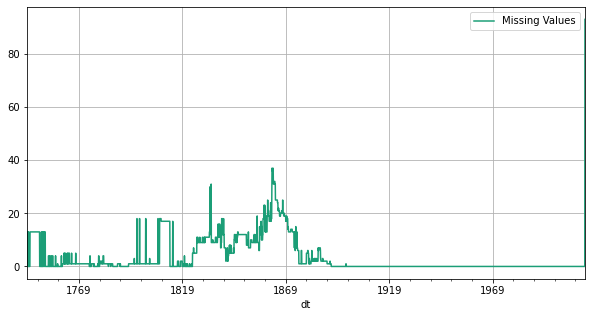

In [61]:
nas_per_dt.plot(figsize = (10,5),colormap = 'Dark2',grid = True)

In [62]:
df.groupby(['dt','City']).mean()['AverageTemperature'].unstack(level = 1).isnull().sum().sort_values()/df['dt'].nunique()

City
Madrid           0.022538
Kiev             0.022538
Moscow           0.022538
London           0.022538
Paris            0.022538
                   ...   
Addis Abeba      0.481630
Nairobi          0.481939
Fortaleza        0.487805
Dar Es Salaam    0.510343
Lima             0.530411
Length: 100, dtype: float64

In [63]:
df['Year'] = df['dt'].apply(lambda x:x.year)
df['Decade'] = df['Year'].apply(lambda x : x//10)

In [66]:
df_decade = df.groupby(['Decade','City']).mean()['AverageTemperature'].unstack(level = 1)
df_decade.head()

City,Abidjan,Addis Abeba,Ahmadabad,Aleppo,Alexandria,Ankara,Baghdad,Bangalore,Bangkok,Belo Horizonte,...,São Paulo,Taipei,Taiyuan,Tangshan,Tianjin,Tokyo,Toronto,Umm Durman,Wuhan,Xian
Decade,,,,,,,,,,,,,,,,,,,,,
174,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.928692,NaN,NaN,NaN
175,NaN,NaN,NaN,NaN,NaN,9.979965,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4.974330,NaN,NaN,NaN
176,NaN,NaN,NaN,NaN,NaN,9.280417,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5.140291,NaN,NaN,NaN
177,NaN,NaN,NaN,NaN,NaN,10.663333,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5.663504,NaN,NaN,NaN
178,NaN,NaN,NaN,NaN,NaN,10.286567,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5.628922,NaN,NaN,NaN


In [70]:
df_decade.columns.values

array(['Abidjan', 'Addis Abeba', 'Ahmadabad', 'Aleppo', 'Alexandria',
       'Ankara', 'Baghdad', 'Bangalore', 'Bangkok', 'Belo Horizonte',
       'Berlin', 'Bogotá', 'Bombay', 'Brasília', 'Cairo', 'Calcutta',
       'Cali', 'Cape Town', 'Casablanca', 'Changchun', 'Chengdu',
       'Chicago', 'Chongqing', 'Dakar', 'Dalian', 'Dar Es Salaam',
       'Delhi', 'Dhaka', 'Durban', 'Faisalabad', 'Fortaleza', 'Gizeh',
       'Guangzhou', 'Harare', 'Harbin', 'Ho Chi Minh City', 'Hyderabad',
       'Ibadan', 'Istanbul', 'Izmir', 'Jaipur', 'Jakarta', 'Jiddah',
       'Jinan', 'Kabul', 'Kano', 'Kanpur', 'Karachi', 'Kiev', 'Kinshasa',
       'Lagos', 'Lahore', 'Lakhnau', 'Lima', 'London', 'Los Angeles',
       'Luanda', 'Madras', 'Madrid', 'Manila', 'Mashhad', 'Melbourne',
       'Mexico', 'Mogadishu', 'Montreal', 'Moscow', 'Nagoya', 'Nagpur',
       'Nairobi', 'Nanjing', 'New Delhi', 'New York', 'Paris', 'Peking',
       'Pune', 'Rangoon', 'Rio De Janeiro', 'Riyadh', 'Rome',
       'Saint Petersbu

Text(0, 0.5, 'Temperature in Celsius')

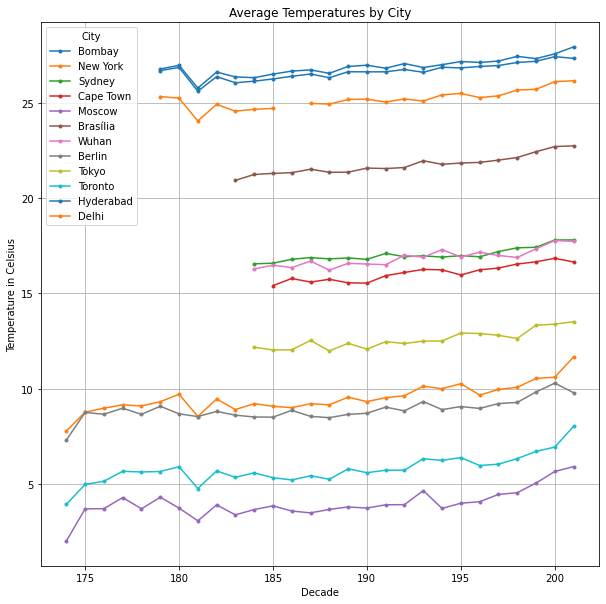

In [122]:
ten_cities = ['Bombay','New York','Sydney','Cape Town','Moscow','Brasília','Wuhan','Berlin','Tokyo','Toronto','Hyderabad','Delhi']
df_decade[ten_cities].plot(figsize = (10,10),subplots = False,grid = True,marker = '.',)
plt.title('Average Temperatures by City')
plt.ylabel('Temperature in Celsius')

In [77]:
gt = pd.read_csv('GlobalTemperatures.csv')
gt.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
gt['dt'] = [datetime.strptime(date,'%Y-%m-%d') for date in gt['dt']]

In [92]:
gt_land = gt.drop(columns = ['LandAverageTemperatureUncertainty','LandMaxTemperature','LandMaxTemperatureUncertainty','LandMinTemperature','LandMinTemperatureUncertainty','LandAndOceanAverageTemperature','LandAndOceanAverageTemperatureUncertainty'])

In [107]:
gt_land.head()

,dt,LandAverageTemperature,Year,Decade
0,1750-01-01,3.034,1750,175
1,1750-02-01,3.083,1750,175
2,1750-03-01,5.626,1750,175
3,1750-04-01,8.490,1750,175
4,1750-05-01,11.573,1750,175


In [96]:
gt_land['Year'] = gt_land['dt'].apply(lambda x:x.year)

In [98]:
gt_land['Decade'] = gt_land['Year'].apply(lambda x:x//10)

In [117]:
gt_decade = gt_land.groupby('Decade').mean()['LandAverageTemperature']

In [118]:
gt_decade.head()

Decade
175    8.149852
176    7.981625
177    8.400108
178    8.141392
179    8.336867
Name: LandAverageTemperature, dtype: float64

Text(0, 0.5, 'Temperature in Celsius')

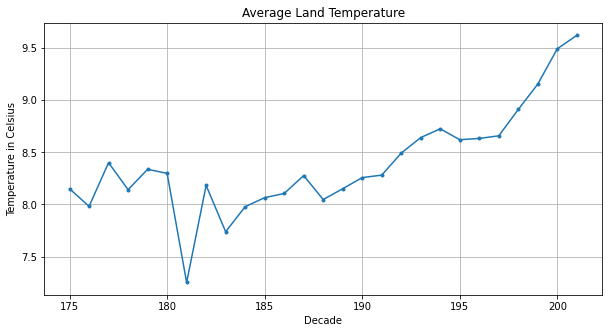

In [123]:

gt_decade.plot(figsize = (10,5), grid = True,marker = '.')
plt.title('Average Land Temperature')
plt.ylabel('Temperature in Celsius')